<a href="https://colab.research.google.com/github/FatherOfLove/258_DL/blob/master/unGraded5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [2]:
data = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#scaling
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
# Add  channels dimension
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

In [5]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
def CNN_model():
  from keras.models import Sequential
  from keras.layers import BatchNormalization
  model = Sequential([
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (32,32,1)),#Dropout(0.75),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.75),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.75),
         BatchNormalization(axis=3),
         MaxPool2D(pool_size=(2,2)),
         #Dropout(0.5),

         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         MaxPool2D(pool_size=(2,2)), 
         #Dropout(0.5),

         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         MaxPool2D(pool_size=(2,2)), 
         #Dropout(0.5),   

         Flatten(),   
         Dense(256, activation = "relu"),
         #Dropout(0.75),   
         (Dense(10, activation = "softmax"))])


  model.compile(optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) , 
                loss = "categorical_crossentropy", metrics=["accuracy"])

  return model

Using TensorFlow backend.


In [0]:
class BiuldModel(Model):
  def __init__(self):
    super(BiuldModel, self).__init__()
    self.conv_layer = Conv2D(32,3,activation='relu')
    self.flatten_layer = Flatten()
    self.dense1 = Dense(128,activation='relu')
    self.dense2 = Dense(10)

  def call(self, X):
    X = self.conv_layer(X)
    X = self.flatten_layer(X)
    X = self.dense1(X)
    return self.dense2(X)

In [7]:
model = BiuldModel()
model

In [0]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = keras.optimizers.Adam()

In [0]:
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy =keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
def train_step(imags, labels):
  with tf.GradientTape() as tape:  
    preds_train = model(imags, training=True)
    loss_train = loss(labels, preds_train)
  grads = tape.gradient(loss_train, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  train_loss(loss_train)
  train_accuracy(labels, preds_train)

In [0]:
def test_step(imags, labels): 
  preds_test = model(imags, training=False)
  loss_test = loss(labels, preds_test)

  test_loss(loss_test)
  test_accuracy(labels, preds_test)

In [0]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(32)

test = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [14]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()
  for imgs, labels in train:
    train_step(imgs, labels)

  for test_imgs, test_labels in test:
    test_step(test_imgs, test_labels)

  str_temp = 'Epoch Num {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(str_temp.format(epoch + 1,train_loss.result(),train_accuracy.result() * 100,
                        test_loss.result(),test_accuracy.result() * 100))

KeyboardInterrupt: ignored

In [18]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Use seaborn for pairplot
!pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs|

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/bin/bash: -c: line 1: syntax error: unexpected end of file


In [19]:
data_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
data_path

'/root/.keras/datasets/auto-mpg.data'

In [20]:
columns = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(data_path, names=columns,na_values = "?", 
                       comment='\t',sep=" ", skipinitialspace=True)

data = df.copy()
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [23]:
# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-5ro4wev6
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-5ro4wev6
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0382a1f98892c95ad026d3ae50e3bdb64820bb3f8_-cp36-none-any.whl size=101463 sha256=16bb3ffe58b270edd0681a9e0c7f53682b0a9beeb24cfd2a45c5ac7f011b01b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-y3srf9tk/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
train = data.sample(frac=0.8,random_state=0)
test = data.drop(train.index)

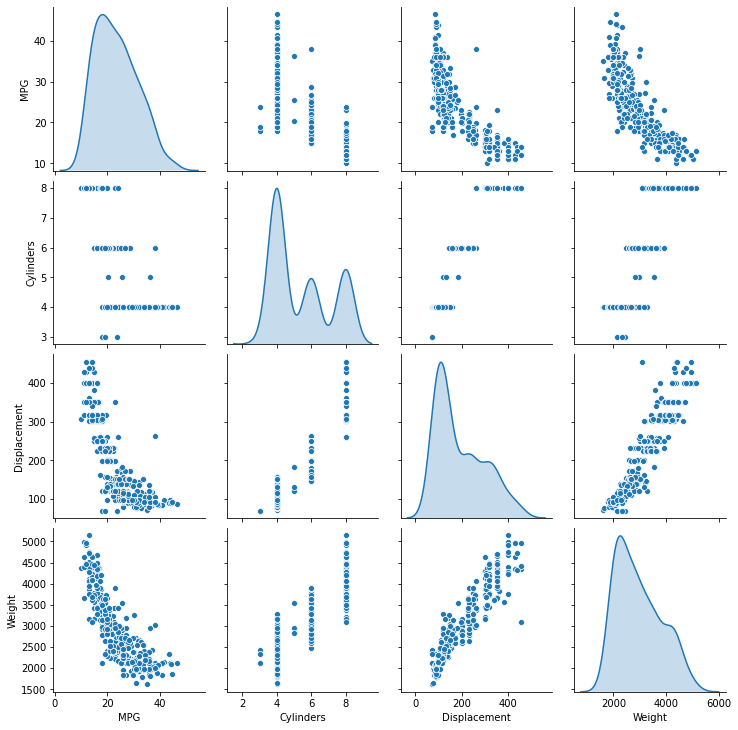

In [25]:
sns.pairplot(train[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [26]:
train_stats = train.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Horsepower,313.0,104.067093,38.674662,46.0,75.00,92.0,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
Origin,318.0,1.553459,0.799430,1.0,1.00,1.0,2.00,3.0


In [0]:
train_labels = train.pop('MPG')
test_labels = test.pop('MPG')

In [0]:
def normalize(X):
  return (X - train_stats['mean']) / train_stats['std']

In [0]:
train_normed = normalize(train)
test_normed = normalize(test)

In [0]:
from keras.layers import Dense
from keras import Sequential
from keras.optimizers import RMSprop

In [0]:
def build_model():
  model = Sequential([
    Dense(64, activation='relu', input_shape=[len(train.keys())]),
    Dense(64, activation='relu'),
    Dense(1)
  ])

  model.compile(loss='mse',optimizer=RMSprop(0.001),metrics=['mae', 'mse'])
  return model

In [32]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [33]:
batch = train_normed[:10]
result = model.predict(batch)
result

array([[-0.30893594],
       [-0.02106033],
       [-0.28666034],
       [-0.01944642],
       [-0.14440067],
       [-0.00104141],
       [ 0.10924174],
       [-0.00907208],
       [-0.24408743],
       [-0.26082683]], dtype=float32)

In [34]:
history = model.fit(train_normed, train_labels, epochs=1000, 
                    validation_split = 0.2, verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:616.6035,  mae:23.5172,  mse:616.6035,  val_loss:619.0314,  val_mae:23.7012,  val_mse:619.0314,  
....................................................................................................
Epoch: 100, loss:69.3937,  mae:6.7018,  mse:69.3937,  val_loss:63.2661,  val_mae:6.3496,  val_mse:63.2661,  
....................................................................................................
Epoch: 200, loss:63.7417,  mae:6.6527,  mse:63.7417,  val_loss:57.3486,  val_mae:6.3241,  val_mse:57.3486,  
....................................................................................................
Epoch: 300, loss:63.7482,  mae:6.6586,  mse:63.7482,  val_loss:57.3443,  val_mae:6.3244,  val_mse:57.3443,  
....................................................................................................
Epoch: 400, loss:63.8332,  mae:6.6587,  mse:63.8332,  val_loss:57.3312,  val_mae:6.3253,  val_mse:57.3312,  
..............................................

MINST DATA

In [35]:
fashion_mnist = keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
train_imgs.shape

(60000, 28, 28)

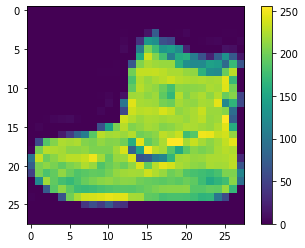

In [39]:
plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_imgs = train_imgs / 255.0

test_imgs = test_imgs / 255.0

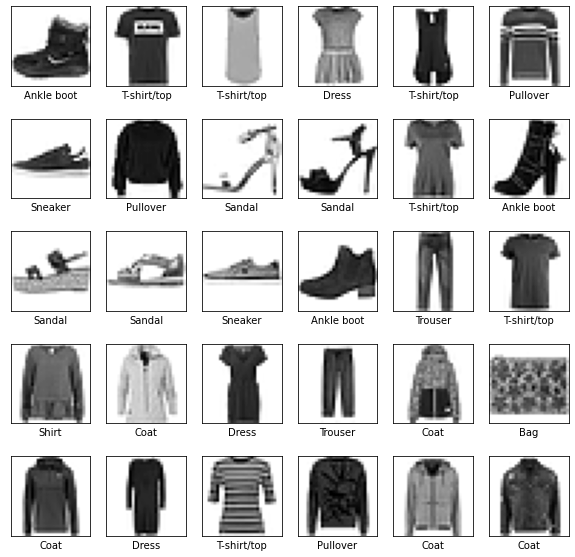

In [41]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                        keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10)
                        ])

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:

model.fit(train_imgs, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4932 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3711 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3342 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2941 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2483 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [45]:
test_loss, test_accuracy = model.evaluate(test_imgs,  test_labels, verbose=2)

print('\nTest accuracy:', test_accuracy)

313/313 - 1s - loss: 0.3434 - accuracy: 0.8824

Test accuracy: 0.8823999762535095
